In [1]:
import numpy as np
import pandas as pd
import wrangle_anomaly as w

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traffic = w.wrangle_web_traffic()

opening file from local directory


In [3]:
traffic

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,slides
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0,javascript-i
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0,jquery
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0,jquery
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2.0,jquery


# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [4]:
traffic.program_id.value_counts(dropna=False)

2.0    713365
3.0    103411
NaN     52893
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [97]:
traffic.reset_index().groupby(['lesson']).\
    program_id.value_counts().sort_values(ascending=False).head(50)

lesson                program_id
javascript-i          2.0           110118
html-css              2.0            79001
mysql                 2.0            77340
jquery                2.0            56787
spring                2.0            53149
java-iii              2.0            52607
java-ii               2.0            51348
java-i                2.0            38180
javascript-ii         2.0            36068
                      2.0            35814
appendix              2.0            30574
toc                   2.0            17428
search                2.0            15214
examples              2.0            13878
fundamentals          3.0             8746
classification        3.0             8620
                      3.0             8358
1-fundamentals        3.0             7945
sql                   3.0             7505
slides                2.0             6590
content               1.0             6397
3-sql                 3.0             6165
python               

In [98]:
traffic[traffic.program_id == 4].reset_index().groupby(['lesson']).\
    program_id.value_counts().sort_values(ascending=False).head(50)

lesson   program_id
content  4.0           4
         4.0           1
Name: program_id, dtype: int64

### The most commonly accessed lesson for each program were:
- Program 1 - 'content' which I don't think is a lesson, 'javascript-i' was the next highest
- Program 2 - 'javascript-i'
- Program 3 - 'fundamentals'
- Program 4 - 'content'

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [99]:
lesson_df1 = pd.DataFrame(traffic[(traffic.cohort_name != 'Staff')].\
                          reset_index().groupby('lesson').\
     cohort_name.value_counts()).rename(columns={'cohort_name':'count'}).\
    reset_index()

In [77]:
lesson_df1.head()

,lesson,cohort_name,count
0,,Darden,2980
1,,Voyageurs,2101
2,,Fortuna,2038
3,,Bayes,1967
4,,Teddy,1828


In [74]:
lesson_df2 = pd.DataFrame(traffic[(traffic.cohort_name != 'Staff')]\
                          .reset_index().groupby('lesson').\
     cohort_name.value_counts(normalize=True)).rename(columns={'cohort_name':'proba'}).\
    reset_index()

In [75]:
lesson_df2.head()

,lesson,cohort_name,proba
0,,Darden,0.075416
1,,Voyageurs,0.053171
2,,Fortuna,0.051577
3,,Bayes,0.049780
4,,Teddy,0.046262


In [12]:
# merge the two data frames create above into a single one:
lesson_df = pd.concat([lesson_df1, lesson_df2.proba], axis=1)
lesson_df.head()

,lesson,cohort_name,count,proba
0,,Darden,2980,0.075416
1,,Voyageurs,2101,0.053171
2,,Fortuna,2038,0.051577
3,,Bayes,1967,0.049780
4,,Teddy,1828,0.046262


In [101]:
lesson_df[(lesson_df['count'] >= 10)
          & (lesson_df.lesson != '')].\
    sort_values('proba', ascending=False).head(50)

,lesson,cohort_name,count,proba
1732,working-with-time-series-data,Darden,14,1.000000
231,3-vocabulary.md,Bayes,12,1.000000
716,dataframes,Florence,11,1.000000
808,florence-python-assessment.html,Florence,16,1.000000
463,acquire,Darden,16,1.000000
929,individual-project,Easley,80,0.987654
1620,study-session-with-ryan,Ceres,23,0.884615
723,distributed-ml,Darden,568,0.861912
1333,nlp,Darden,1106,0.822917
915,index.html,Lassen,877,0.787253


In [137]:
top_lessons = {}
for cohort in lesson_df.cohort_name:
    print(cohort)
    thing = lesson_df[lesson_df.cohort_name == cohort].\
            sort_values('proba', ascending=False).head(3)
    print(thing)
    for i in thing:
        print(i)
        top_lessons['cohort'] = i.cohort_name
        top_lessons['lesson'] = i.lesson
        top_lessons['count'] = i.count
        top_lessons['proba'] = i.proba

Darden
                             lesson cohort_name  count  proba
1732  working-with-time-series-data      Darden     14    1.0
463                         acquire      Darden     16    1.0
557                      bad-charts      Darden      1    1.0
lesson


AttributeError: 'str' object has no attribute 'cohort_name'

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [14]:
traffic.head(2)

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii


#### To get accesses during active status, we will need to find all instances where datetimes is between start_date and end_date for each user

In [15]:
active_df = traffic[(traffic.start_date < traffic.index)
                    & (traffic.end_date > traffic.index)
                    & (traffic.cohort_name != 'Staff')]

In [16]:
active_df.groupby('user_id').lesson.count().sort_values().head(50)

user_id
918     1
879     1
940     1
619     1
832     3
278     4
539     5
956     6
812     7
388     8
679    11
572    12
941    12
697    13
889    16
487    17
968    17
963    18
340    18
961    20
49     25
64     25
772    26
24     26
41     28
976    29
972    34
973    35
529    36
959    41
967    41
981    42
371    42
971    44
964    45
741    47
960    48
56     52
543    53
46     54
965    55
978    55
962    58
57     62
858    63
36     65
45     65
250    67
975    67
969    71
Name: lesson, dtype: int64

In [17]:
active_df.groupby('user_id').lesson.count().sort_values().head(50).index

Int64Index([918, 879, 940, 619, 832, 278, 539, 956, 812, 388, 679, 572, 941,
            697, 889, 487, 968, 963, 340, 961,  49,  64, 772,  24,  41, 976,
            972, 973, 529, 959, 967, 981, 371, 971, 964, 741, 960,  56, 543,
             46, 965, 978, 962,  57, 858,  36,  45, 250, 975, 969],
           dtype='int64', name='user_id')

In [18]:
low_activity_users = active_df.groupby('user_id').\
    lesson.count().sort_values().head(50).index

In [19]:
low_activity_df = pd.DataFrame(active_df[active_df.user_id.isin(low_activity_users)])

In [20]:
low_activity_user_df = pd.DataFrame(active_df[active_df.user_id.isin(low_activity_users)]\
    [['user_id','ip','cohort_name','start_date', 'end_date']].\
    groupby('user_id').value_counts()).rename(columns={0:'counts'}).reset_index()

In [21]:
low_activity_user_df

,user_id,ip,cohort_name,start_date,end_date,counts
0,24,97.105.19.61,Sequoia,2017-09-27,2018-02-15,26
1,36,173.174.159.45,Sequoia,2017-09-27,2018-02-15,34
2,36,97.105.19.61,Sequoia,2017-09-27,2018-02-15,25
3,36,72.181.117.226,Sequoia,2017-09-27,2018-02-15,3
4,36,64.134.159.125,Sequoia,2017-09-27,2018-02-15,2
...,...,...,...,...,...,...
79,978,73.85.64.161,Oberon,2021-04-12,2021-10-01,42
80,978,172.58.14.166,Oberon,2021-04-12,2021-10-01,10
81,978,172.58.12.225,Oberon,2021-04-12,2021-10-01,2
82,978,172.58.14.191,Oberon,2021-04-12,2021-10-01,1


In [22]:
low_activity_df.head()

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 11:24:17,appendix,24,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,appendix
2018-01-26 11:24:29,appendix/capstone-workbook,24,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,appendix
2018-01-26 12:33:51,/,36,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,
2018-01-26 13:51:13,mysql,36,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,mysql
2018-01-26 13:51:15,mysql/users,36,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0,mysql


In [23]:
low_activity_df.groupby('cohort_name').user_id.nunique()

cohort_name
Andromeda     1
Bayes         1
Ceres         1
Darden        2
Europa        3
Fortuna       1
Ganymede      2
Hyperion      1
Jupiter       2
Kalypso       1
Marco         2
Neptune       4
Oberon       17
Sequoia       7
Teddy         1
Voyageurs     2
Yosemite      1
Zion          1
Name: user_id, dtype: int64

#### There are 49 users that accessed the content less than 70 times while active. The most users with low access came from cohorts Oberon and Sequoia

# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [33]:
no_cohort = traffic[traffic.cohort_id.isna() == True]

In [51]:
no_cohort_ip = pd.DataFrame(no_cohort[no_cohort.lesson != ''].\
             groupby('lesson').ip.value_counts()).\
    rename(columns={'ip':'count'}).reset_index()

In [59]:
no_cohort_ip.sort_values('count', ascending=False)

,lesson,ip,count
2864,search,97.105.19.58,1036
2496,javascript-i,70.117.16.60,434
1788,Intro_to_Regression_Module,97.105.19.58,306
2497,javascript-i,70.94.165.107,287
1872,Regression_Python,97.105.19.58,280
...,...,...,...
1837,Pipeline_Demo,71.42.140.139,1
1836,Pipeline_Demo,70.120.3.141,1
1835,Pipeline_Demo,67.11.62.220,1
1834,Pipeline_Demo,24.26.242.9,1


In [125]:
no_cohort_ip.ip.nunique()

356

### There are 365 ip addresses that accessed content while not being assigned to a cohort

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [25]:
traffic.lesson.value_counts().head(20)

javascript-i      118723
html-css           84935
mysql              82320
jquery             60869
spring             58603
java-iii           56733
java-ii            55107
                   50313
java-i             41158
javascript-ii      38796
appendix           36867
search             19524
toc                18297
examples           14855
classification     11476
fundamentals       11162
1-fundamentals     10159
content             9308
sql                 9045
slides              7700
Name: lesson, dtype: int64

In [26]:
traffic[traffic.lesson == 'javascript-i'].groupby('program_id').\
    resample('D').user_id.nunique().reset_index()

,program_id,datetime,user_id
0,1.0,2018-01-26,2
1,1.0,2018-01-27,0
2,1.0,2018-01-28,1
3,1.0,2018-01-29,3
4,1.0,2018-01-30,3
...,...,...,...
1976,3.0,2019-12-10,0
1977,3.0,2019-12-11,0
1978,3.0,2019-12-12,0
1979,3.0,2019-12-13,0


In [27]:
js_1 = traffic[traffic.lesson == 'javascript-i'].groupby('program_id').\
    resample('D').user_id.nunique().reset_index()

In [104]:
js_1 = traffic[(traffic.lesson == 'fundamentals') 
               &(traffic.program_id == 2)
              &(traffic.index > '2019-09')].groupby('program_id').\
    resample('D').user_id.nunique().reset_index()

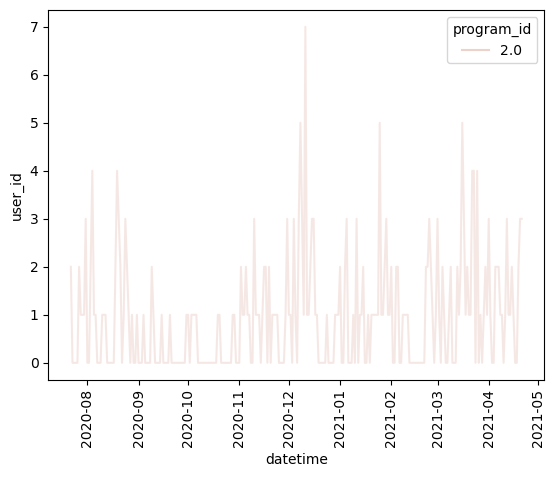

In [105]:
sns.lineplot(data=js_1, x='datetime', y='user_id', hue='program_id', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

- The last access to Javascript lessons for program 1 was on 2020-01-15.
- program 2 appears to be able to access all content
- The last access to Javascript lessons for program 3 was on 2019-12-15.

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [88]:
after_grad = traffic[(traffic.index > traffic.end_date) 
                     & (traffic.cohort_name != 'Staff') 
                     & (traffic.lesson != '')]

In [89]:
after_grad.head(2)

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii


In [94]:
after_grad.groupby('lesson').program_id.value_counts().\
    sort_values(ascending=False).head(50)

lesson             program_id
spring             2.0           9638
javascript-i       2.0           9141
html-css           2.0           6711
content            1.0           6397
mysql              2.0           6040
java-ii            2.0           5160
java-i             2.0           5025
appendix           2.0           4917
java-iii           2.0           4763
javascript-ii      2.0           4090
jquery             2.0           4077
javascript-i       1.0           3708
html-css           1.0           2463
spring             1.0           2324
search             2.0           2224
mysql              1.0           2067
java-iii           1.0           1953
content            2.0           1765
java-ii            1.0           1572
jquery             1.0           1526
toc                2.0           1511
java-i             1.0           1456
javascript-ii      1.0           1405
appendix           1.0           1081
fundamentals       3.0           1053
sql                3

In [106]:
after_grad[after_grad.lesson == 'spring']

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-01-26 13:57:51,spring/extra-features/file-upload,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0,spring
2018-01-29 11:05:52,spring,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0,spring
2018-01-29 11:05:55,spring/extra-features/json-response,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0,spring
2018-01-29 11:34:58,spring,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0,spring
2018-01-29 11:35:16,spring/fundamentals/controllers,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0,spring
...,...,...,...,...,...,...,...,...,...
2021-04-20 15:31:29,spring,122,23.0,69.130.123.181,Ulysses,2018-03-05,2018-07-19,2.0,spring
2021-04-20 20:39:53,spring,773,62.0,70.121.201.159,Jupiter,2020-09-21,2021-03-30,2.0,spring
2021-04-20 20:39:56,spring/setup,773,62.0,70.121.201.159,Jupiter,2020-09-21,2021-03-30,2.0,spring


In [107]:
after_grad[after_grad.program_id == 4]

,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,program_id,lesson
datetime,,,,,,,,,
2018-03-22 19:01:54,content/html-css,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0,content
2018-03-22 19:01:54,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0,content
2018-03-22 19:02:47,content/html-css,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0,content
2018-03-22 19:02:52,content/html-css/introduction.html,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0,content


- Program 1 - 'content' is the most accessed lesson, followed by 'javascript-i'
- Program 2 - 'spring' is the most accessed lesson, followed by 'javascript-i'
- Program 3 - 'fundamentals' is the most accessed lesson
- Program 4 - 'content' is the only accessed lesson

# 7. Which lessons are least accessed?

In [123]:
traffic.groupby('lesson').path.count().sort_values().head(178).index.to_list()

['wp-login',
 '2.00.01_Navigating_Excel.md',
 'extra',
 'evaluate',
 'end_to_end_clustering',
 'diagram-of-ds-pipeline-fraud-example.jpeg',
 'decision-trees',
 'data-science-pipeline',
 'data-science-modules.jpg',
 'data-science',
 'data-1',
 '2.03.04_StatisticalTestEvaluation',
 'curie-statistics-assessment',
 'curie-python-assessment.html',
 '2.0_Intro_Stats',
 '2.1-spreadsheets-overview',
 'creating-charts',
 '3-vocabulary',
 'codeupexercises',
 'codeup-exercises',
 '3.5-evaluation.md',
 'cheatsheet.tex',
 'case-statements',
 'capsones',
 'extra-',
 'bonus-exercises',
 'f',
 '167',
 'itc%20-%20ml',
 'introduction-to-python',
 'introduction-to-matplotlib',
 'interview_questions',
 'interview-questions',
 'interview',
 'instructors',
 'index',
 'imports',
 'htmle-css',
 'home',
 'hfdgafdja',
 'help',
 'hello-bayes-cohort-yall-are-awesome',
 'handouts',
 '130',
 '131',
 '132',
 '133',
 'hand',
 'habn',
 'glossary',
 'file.dat',
 '2-sql',
 '13-storytelling',
 'bad-charts',
 'asset-manif

### There are 178 lessons that were all accessed only once, it is not clear which paths were not correct